<a href="https://colab.research.google.com/github/dimou-gk/Deep-dive-ML/blob/main/Deep_Neural_Networks_%26_Deep_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import pandas as pd
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# 2-4. Load Dataset & Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
def normalize(data):
  return (data - np.min(data)) / (np.max(data) - np.min(data))

x_train_normalized = normalize(x_train)
x_test_normalized = normalize(x_test)

In [ ]:
y_train_one_hot = tf.one_hot(indices=y_train, depth=10)
y_test_one_hot = tf.one_hot(indices=y_test, depth=10)

In [ ]:
import random
SEED = 0

def set_seeds(seed=SEED):
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)

# 5. Creation of MLP Neural Network

In [ ]:
input_shape = (784,)
num_hidden_layers = 2
units_per_layer = 128
activation = 'relu'
num_classes = 10

mlp = tf.keras.Sequential(name='my-mlp')
mlp.add(tf.keras.layers.Input(input_shape, name='input_layer'))
for i in range(num_hidden_layers):
    mlp.add(tf.keras.layers.Dense(units=units_per_layer, activation=activation, name=f'hidden_layer_{i+1}'))
mlp.add(tf.keras.layers.Dense(units=num_classes, activation='softmax', name='output_layer'))
mlp.summary()

Model: "my-mlp"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)               │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Our MLP Neural Network consists of the following architecture. First we initialize our NN with an input fully connected layer. Then we create two hidden layers each with 128 as output and ReLU as actication function. Finaly we add another fully connected output layer with softmax as activation function, which returns probabilities the input beloning to each of our classes (adding to 1)

# 6. Creation of CNN

In [ ]:
num_classes = 10
num_conv_layers = 2
num_filters = 64
kernel_size = (5, 5)
strides = (1, 1)
mlp_num_hidden_layers = 2
mlp_units_per_layer = 128
activation = 'relu'
dropout_rate = 0.4

x_train_cnn = np.reshape(x_train_normalized, (x_train_normalized.shape[0], 28,28,1))
x_test_cnn = np.reshape(x_test_normalized, (x_test_normalized.shape[0], 28,28,1))

cnn = tf.keras.Sequential(name='my-cnn')
cnn.add(tf.keras.layers.Input((28, 28, 1), name='input_layer'))

# CNN
for i in range(num_conv_layers):
    cnn.add(
        tf.keras.layers.Conv2D(
            filters=num_filters,
            kernel_size=kernel_size,
            strides=strides,
            activation=activation,
            name=f'conv_layer_{i+1}'
        )
    )
    cnn.add(tf.keras.layers.Dropout(rate=0.4, name=f'dropout_{i+1}'))
    cnn.add(tf.keras.layers.MaxPooling2D(name=f'maxpool_{i+1}'))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# MLP
for i in range(mlp_num_hidden_layers):
    cnn.add(tf.keras.layers.Dense(units=mlp_units_per_layer, activation=activation, name=f'hidden_layer_{i+1}'))
cnn.add(tf.keras.layers.Dense(units=num_classes, activation='softmax', name='output_layer'))
cnn.summary()

Model: "my-cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv_layer_1 (Conv2D)                │ (None, 24, 24, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_1 (MaxPooling2D)             │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv_layer_2 (Conv2D)                │ (None, 8, 8, 64)            │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ maxpool_2 (MaxPooling2D)             │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_1 (Dense)               │ (None, 128)                 │         131,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden_layer_2 (Dense)               │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 253,130 (988.79 KB)

 Trainable params: 253,130 (988.79 KB)

 Non-trainable params: 0 (0.00 B)

This model combines a CNN with an MLP.

* Input Layer: It takes grayscale images of size 28x28x1.
* CNN Block: It has 2 convolutional layers with 64 filters of size (5x5), ReLU activation, followed by Dropout (0.4) and MaxPooling2D layers for each convolutional layer.
* Flattening: The output of the CNN is flattened into a 1D vector.
* MLP Block: It has 2 Dense (fully connected) layers with 128 units each and ReLU activation.
* Output Layer: A final Dense layer with softmax activation outputs predictions for 10 classes.

# Training & Testing

In [ ]:
loss=tf.keras.losses.CategoricalCrossentropy()
# optimizer=tf.keras.optimizers.Adam(1e-3)
metrics=['accuracy']
batch_size = 32
epochs = 50

In [ ]:
x_train_normalized = x_train.reshape(-1, 28 * 28)
x_test_normalized = x_test.reshape(-1, 28 * 28)

train_dataset = tf.data.Dataset.from_tensor_slices((x_train_normalized, y_train_one_hot))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_normalized, y_test_one_hot))
test_dataset = test_dataset.batch(batch_size)

device_name = tf.test.gpu_device_name()
with tf.device(device_name):
    mlp.compile(loss=loss,
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'],
                )

    history = mlp.fit(x=train_dataset, epochs=epochs, validation_data=test_dataset, verbose=1)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8344 - loss: 4.6852 - val_accuracy: 0.9231 - val_loss: 0.4588
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9244 - loss: 0.3857 - val_accuracy: 0.9284 - val_loss: 0.3119
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9440 - loss: 0.2255 - val_accuracy: 0.9397 - val_loss: 0.2519
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9543 - loss: 0.1694 - val_accuracy: 0.9476 - val_loss: 0.1983
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9604 - loss: 0.1412 - val_accuracy: 0.9462 - val_loss: 0.1958
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9649 - loss: 0.1290 - val_accuracy: 0.9539 - val_loss: 0.1917
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9689 - loss: 0.1141 - val_accuracy: 0.9488 - val_loss: 0.2431
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9709 - loss: 0.1115 - 

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_cnn, y_train_one_hot))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((x_test_cnn, y_test_one_hot))
test_dataset = test_dataset.batch(batch_size)

with tf.device(device_name):
    cnn.compile(loss=loss,
                optimizer=tf.keras.optimizers.Adam(1e-3),
                metrics=['accuracy'],
                )

    history = cnn.fit(x=train_dataset, epochs=epochs, validation_data=test_dataset, verbose=1)

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9068 - loss: 0.2852 - val_accuracy: 0.9843 - val_loss: 0.0970
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9832 - loss: 0.0570 - val_accuracy: 0.9877 - val_loss: 0.0674
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9869 - loss: 0.0446 - val_accuracy: 0.9881 - val_loss: 0.0523
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9892 - loss: 0.0353 - val_accuracy: 0.9911 - val_loss: 0.0406
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0306 - val_accuracy: 0.9919 - val_loss: 0.0418
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9920 - loss: 0.0268 - val_accuracy: 0.9908 - val_loss: 0.0333
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9927 - loss: 0.0240 - val_accuracy: 0.9910 - val_loss: 0.0370
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9930 - loss: 0.0234 

Our CNN models performance is near perfect but we could try improving it by using another form of Pooling or change the Learning Rate using a sceduler. Finaly we could add Residual Connections

# Part 2 – Deep Reinforcement Learning

## Install Libraries

In [1]:
!pip install swig
!pip install gymnasium[box2d]
!pip install ray[rllib]==2.6.0
!pip install tensorflow==2.11.0
!pip install tensorflow-probability==0.17
!pip install renderlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 13.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 53.7 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376478 sha256=bf052492412b48d6f227e0228fbba5e7c044e5ebef3970a41fa6614085085112
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 836.9/836.9 kB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.6 MB/s eta 0:00:00
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstallin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 77.5 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-probability
    Found existing installation: tensorflow-probability 0.24.0
    Uninstalling tensorflow-probability-0.24.0:
      Successfully uninstalled tensorflow-probability-0.24.0


## 3. Meaning of main functions


*   step(): This function updates the environment's state based on the actions provided by the agent.
*   reset(): This function initializes or resets the environment to its starting state, typically at the beginning of an episode.
* render(): This function visualizes the environment, aiding in debugging, analysis, and understanding of what the agent "sees."


## 4. Load Libraries & Gumnasium initialization

In [1]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import ray
from ray.rllib.algorithms.ppo import PPOConfig

/usr/local/lib/python3.10/dist-packages/ray/tune/logger/tensorboardx.py:41: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  VALID_NP_HPARAMS = (np.bool8, np.float32, np.float64, np.int32, np.int64)
/usr/local/lib/python3.10/dist-packages/tensorflow_probability/python/__init__.py:57: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if (distutils.version.LooseVersion(tf.__version__) <
2024-12-23 11:05:25,913	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
class LunarLanderV2(gym.Env):
    def __init__(self, env_config=None):
        self.env = gym.make('LunarLander-v2')
        self.action_space = gym.spaces.Discrete(4)
        self.observation_space = gym.spaces.Box(
            low=np.float32([-2.5, -2.5, -10.0, -10.0, -6.2831855, -10.0, 0.0, 0.0]),
            high=np.float32([2.5, 2.5, 10.0, 10.0, 6.2831855, 10.0, 1.0, 1.0]),
            shape=(8,),
            dtype=np.float32
        )

    def reset(self, **kwargs):
        obs = self.env.reset(seed=None, options=None)
        return obs

    def step(self, action):
        obs, reward, done, truncated, _ = self.env.step(action)
        return obs, reward, done, truncated, {}

    def render(self, **kwargs):
        self.env.render(mode='human')

# 5. Agent Training

2024-12-23 11:41:09,503	INFO worker.py:1621 -- Started a local Ray instance.
2024-12-23 11:41:11,698	WARNING algorithm_config.py:2534 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
2024-12-23 11:41:11,702	WARNING algorithm_config.py:2534 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
/usr/local/lib/python3.10/dist-packages/ray/rllib

Episode 0 | Returns = -258.6157997410638
Episode 1 | Returns = -78.34635444380636
Episode 2 | Returns = -130.08181530760302
Episode 3 | Returns = -102.95149314826647
Episode 4 | Returns = -160.3082479506226
Episode 5 | Returns = -31.665315979498317
Episode 6 | Returns = -28.141030435489014
Episode 7 | Returns = -213.05098212272648
Episode 8 | Returns = 13.338919629261625
Episode 9 | Returns = -16.970054333788298
Episode 10 | Returns = -53.618886582122165
Episode 11 | Returns = -22.298512221033704
Episode 12 | Returns = -2.6016544443502028
Episode 13 | Returns = 76.82524503446645
Episode 14 | Returns = -25.164120288182687
Episode 15 | Returns = -36.92021805920674
Episode 16 | Returns = 92.54271260372869
Episode 17 | Returns = -18.89863746412378
Episode 18 | Returns = 164.59698872153473
Episode 19 | Returns = 98.6525766934777
Episode 20 | Returns = -35.517373570016815
Episode 21 | Returns = 71.95867257451474
Episode 22 | Returns = -39.41943898453522
Episode 23 | Returns = 66.278634992429

Text(0, 0.5, 'Return')

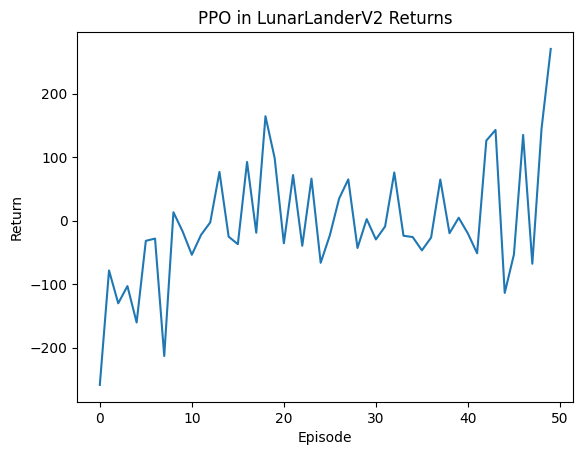

In [9]:
# Initialize the agent
ray.shutdown()
ray.init()

config = PPOConfig()
# Configure the agent (use the settings provided in the image)
config.use_critic = True
config.use_gae = True
config.lambda_ = 0.95
config.use_kl_loss = True
config.kl_coeff = 0.2
config.vf_loss_coeff = 0.5
config.entropy_coeff = 0.001
config.clip_param = 0.2
config.gamma = 0.99
config.lr = 0.0005
config.num_epochs = 30
config.minibatch_size = 32
config.shuffle_batch_per_epoch = True
config.train_batch_size = 2048
config.num_gpus = 1
config.enable_rl_module_api = False
config.model.update({
    'fcnet_hiddens': [256, 256],
    'fcnet_activation': 'relu',
    'vf_share_layers': True,
    'use_lstm': False
})

algorithm = config.framework(framework='tf2').environment(env=LunarLanderV2, env_config={}).build()

def eval(policy, env, render):
  cumulative_rewards = 0.0
  done = False

  obs, _ = env.reset()
  while not done:
    action = policy.compute_single_action(obs)[0]
    obs, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    cumulative_rewards += reward

    if render:
      env.render()

  return cumulative_rewards

def train(agent, env, episodes):
  cumulative_rewards_per_episode = []
  for episode in range(episodes):
    metrics_dict = algorithm.train()

    cumulative_rewards = eval(agent.get_policy(), env, False)
    cumulative_rewards_per_episode.append(cumulative_rewards)

    print(f'Episode {episode} | Returns = {cumulative_rewards}')
  return cumulative_rewards_per_episode

returns = train(algorithm, LunarLanderV2(), 50)
plt.plot(returns)
plt.title('PPO in LunarLanderV2 Returns')
plt.xlabel('Episode')
plt.ylabel('Return')

## 6. Agent Visualization

In [10]:
import renderlab as rl

env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = rl.RenderFrame(env, './output')

observation, info = env.reset()

while True:
  action = algorithm.compute_single_action(observation)
  observation, reward, terminated, truncated, info = env.step(action)

  if terminated or truncated:
    break

env.play()

/usr/local/lib/python3.10/dist-packages/moviepy/config_defaults.py:1: DeprecationWarning: invalid escape sequence '\P'
  """
/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: DeprecationWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
  from scipy.ndimage.filters import sobel

  if event.key is 'enter':

  if not isinstance(terminated, (bool, np.bool8)):



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4
